In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from trainFunctions import random_train_test_split

# Iris Dataset Analysis

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display stats about data
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# get all columns' name
df.columns

Index([0, 1, 2, 3, 4], dtype='int64')

In [7]:
# rename columns
df = df.rename(columns=dict(zip(df.columns, ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'])))
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Exploratory Data Analysis
*Visualize histograms of the data*


<Axes: >

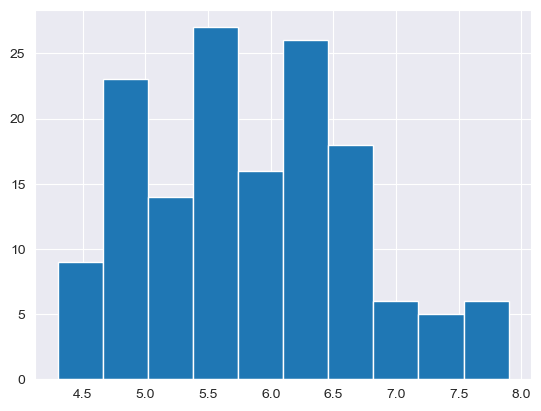

In [9]:

df['SepalLength'].hist()

<Axes: >

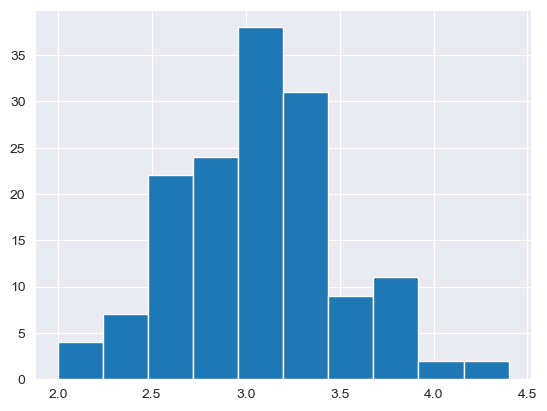

In [10]:
df['SepalWidth'].hist()

<Axes: >

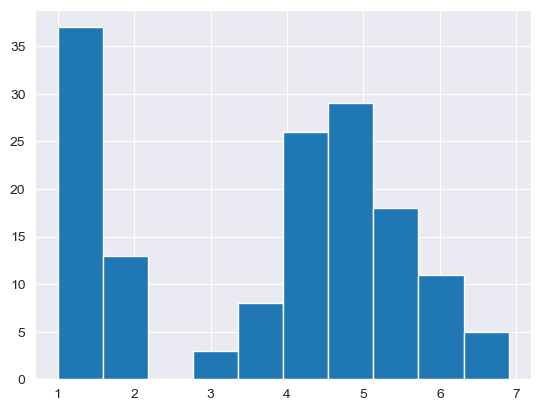

In [11]:
df['PetalLength'].hist()

<Axes: >

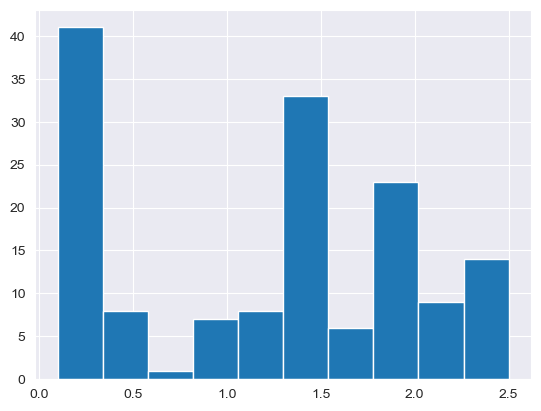

In [12]:
df['PetalWidth'].hist()

In [13]:
# create list of colors and class labels
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
species_size = len(species)

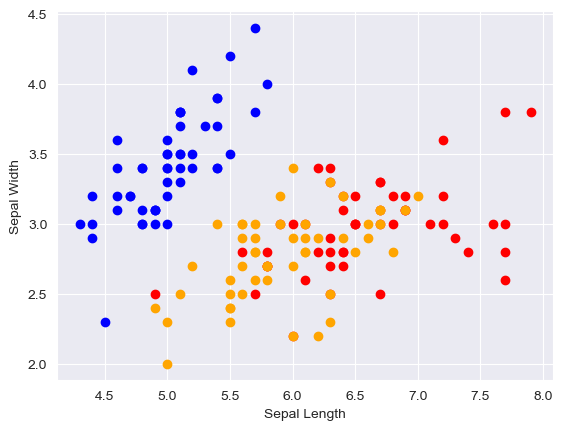

In [14]:
for i in range(species_size):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLength'], x['SepalWidth'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

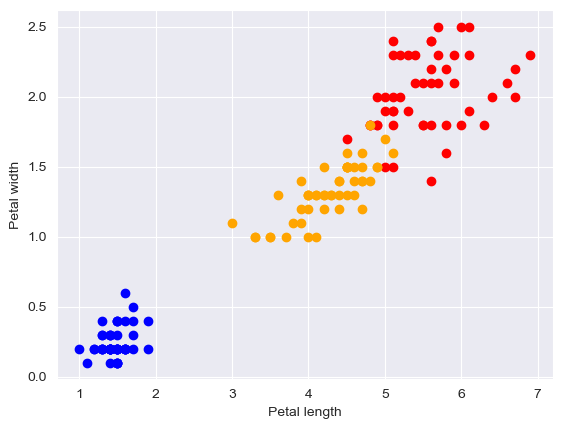

In [15]:
for i in range(species_size):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLength'], x['PetalWidth'], c = colors[i], label = species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

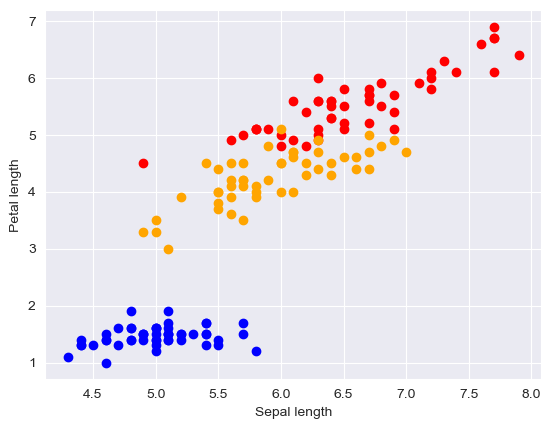

In [16]:
for i in range(species_size):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLength'], x['PetalLength'], c = colors[i], label = species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()

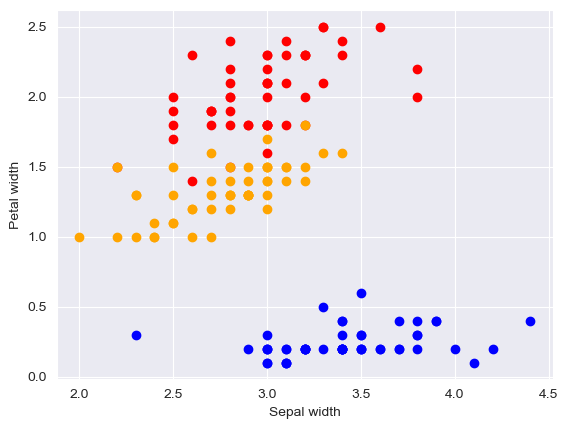

In [17]:
for i in range(species_size):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidth'], x['PetalWidth'], c = colors[i], label = species[i])
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.show()

## Label Encoder

In [18]:
# Get all different Species
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
unique_species = df['Species'].unique()
label_map = {species: label for label, species in enumerate(unique_species)}
label_map

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [20]:
df['Species'] = df['Species'].map(label_map)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.



In [21]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLength,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidth,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

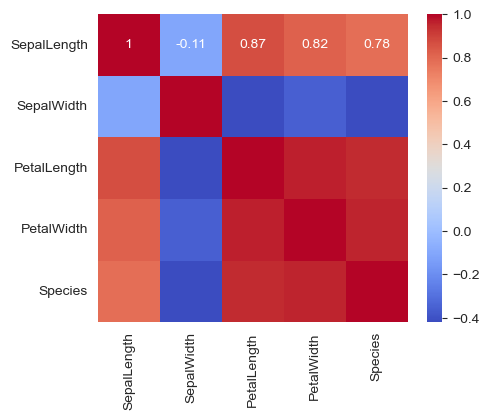

In [22]:
corr = df.corr()
# plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Model Training and Testing


In [23]:
# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = random_train_test_split(X, Y, test_size_percentage=0.30)

In [24]:
input_size = x_train.shape[1]
input_size

4

In [46]:
x = x_train[0]
x

array([4.7, 3.2, 1.3, 0.2])

In [47]:
w1 = np.random.randn(input_size, 5) * np.sqrt(2/5)

In [48]:
w1

array([[-1.22185543,  0.12678793,  0.2571473 , -0.07672438,  0.06622062],
       [-0.29271922,  1.16910573,  0.18677073, -1.03714584, -0.58182535],
       [ 1.08618252, -0.02206445, -0.22449503,  0.8164051 , -0.3545222 ],
       [ 0.96426364, -0.16398947, -0.0486324 , -0.46202484,  0.73922177]])

In [49]:
b1 = np.zeros((1, 5))
b1

array([[0., 0., 0., 0., 0.]])

In [52]:
h1 = np.dot(x, w1) + b1
h1

array([[-5.074532  ,  4.27555991,  1.50468863, -2.71054961, -1.86363871]])

In [58]:
h1 = np.array(h1)
np.maximum(0, h1)

array([[0.        , 4.27555991, 1.50468863, 0.        , 0.        ]])

In [25]:
def relu(x):
    return max(0, x)
def relu_gradient(x):
    return 1 if x > 0 else 0

In [26]:
def sgd_step(weights, gradients, learning_rate):
    new_weights = []
    for w, g in zip(weights, gradients):
        new_weights.append(w - learning_rate * g)
    return new_weights

weights = [0.5, -0.3, 0.8]
input = [1.0, -1.0, 0.5]

# Forward pass
relu_output = [relu(x) for x in input]

# Assume some gradient received from the next layer
gradient_from_next_layer = [0.1, -0.2, 0.05]

# Backpropagation with ReLU
backprop_gradient = [g * relu_gradient(x) for g, x in zip(gradient_from_next_layer, input)]

# SGD step
learning_rate = 0.01
new_weights = sgd_step(weights, backprop_gradient, learning_rate)

print("Updated weights:", new_weights)

Updated weights: [0.499, -0.3, 0.7995000000000001]


In [27]:
x = 2
k = 3
output_x = relu(x)
output_kx = relu(k * x)

print("ReLU(x):", output_x)
print("ReLU(kx):", output_kx)
print("k * ReLU(x):", k * output_x)

ReLU(x): 2
ReLU(kx): 6
k * ReLU(x): 6
